# Amazon Data Analysis

## Table of contents<a name=top></a>
1. [Data description](#des)<br>
1. [Importing Libraries](#lib)<br>
1. [Load datasets](#load)<br>
1. [Pre-processing](#pre)<br>
1. [Analysis](#anal)<br>
    * [Showing the location distribution](#map)<br>
    * [Sale Time Analysis](#time)<br>
    * [Sale Category Analysis](#cat)<br>

## Data description<a name=des></a>
This project is on the analysis of Amazon product sale in different zones in the US. More details can be found [here](https://www.kaggle.com/datasets/anandshaw2001/amazon-sales-dataset). We aim to do different analysis on this data, such as date of orders, to see trends in sales and profit over time, customer and product analysis, and so on. The dataset has 3203 rows with no missing values. 



## Importing Libraries<a name=lib></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm

## Load datasets<a name=load></a>

In [2]:
amazon_data=pd.read_csv(r'E:\My projects\amazon\Amazon.csv')
amazon_data.head(2)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,6/13/2013,6/17/2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17


In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   EmailID       3203 non-null   object 
 4   Geography     3203 non-null   object 
 5   Category      3203 non-null   object 
 6   Product Name  3203 non-null   object 
 7   Sales         3203 non-null   float64
 8   Quantity      3203 non-null   float64
 9   Profit        3203 non-null   float64
dtypes: float64(3), object(7)
memory usage: 250.4+ KB


## Pre-processing<a name=pre></a>
As we see, there are no missing values in the data frame. We start by omitting unnecessary columns, `Order ID` and `EmailID`. The date-time columns are also saved as objects. So we should first convert their types to `datetime`.

In [4]:
amazon_data.drop(['Order ID','EmailID'], axis=1,inplace=True)
amazon_data.head(2)

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit
0,6/13/2013,6/17/2013,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,6/9/2011,6/14/2011,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17


In [5]:
amazon_data['Order Date']=pd.to_datetime(amazon_data['Order Date'])
amazon_data['Ship Date']=pd.to_datetime(amazon_data['Ship Date'])
amazon_data.head(10)

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit
0,2013-06-13,2013-06-17,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,2011-06-09,2011-06-14,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,2011-06-09,2011-06-14,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,2011-06-09,2011-06-14,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
5,2011-06-09,2011-06-14,"United States,Los Angeles,California",Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5.0,34.47
6,2011-06-09,2011-06-14,"United States,Los Angeles,California",Tables,Chromcraft Rectangular Conference Tables,1706.18,9.0,85.31
7,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Konftel 250 ConferenceÂ phoneÂ - Charcoal black,911.42,4.0,68.36
8,2013-12-06,2013-12-11,"United States,Seattle,Washington",Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3.0,132.59
9,2011-05-13,2011-05-15,"United States,West Jordan,Utah",Storage,Fellowes Super Stor/Drawer,55.50,2.0,9.99


In [6]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3203 non-null   datetime64[ns]
 1   Ship Date     3203 non-null   datetime64[ns]
 2   Geography     3203 non-null   object        
 3   Category      3203 non-null   object        
 4   Product Name  3203 non-null   object        
 5   Sales         3203 non-null   float64       
 6   Quantity      3203 non-null   float64       
 7   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 200.3+ KB


## Analysis<a name=anal></a>

### Showing the location distribution<a name=map></a>
The first thing to do is to separate the location by country, state, and the city from `Geography` column.

In [7]:
amazon_data[['country', 'city', 'state']] = amazon_data['Geography'].str.split(',', expand=True)

In [8]:
len(amazon_data['city'].unique())

169

#### Note
Since the number of cities are high, we see the distribution based on the states.

In [9]:
city_counts = amazon_data.groupby('state')['city'].value_counts().unstack(fill_value=0)
most_frequent_cities = city_counts.idxmax(axis=1)
most_frequent_cities

state
Arizona               Phoenix
California        Los Angeles
Colorado               Denver
Idaho               Pocatello
Montana           Great Falls
Nevada        North Las Vegas
New Mexico        Albuquerque
Oregon            Springfield
Utah                    Provo
Washington            Seattle
Wyoming              Cheyenne
dtype: object

In [10]:
def lat(data):
    if data['state']=='Arizona':
        return 33.4484367
    if data['state']=='California':
        return 34.0536909
    if data['state']=='Colorado':
        return 39.7392364
    if data['state']=='Idaho':
        return 42.8620287
    if data['state']=='Montana':
        return 47.5048851
    if data['state']=='Nevada':
        return 36.2005843
    if data['state']=='New Mexico':
        return 35.0841034
    if data['state']=='Oregon':
        return 44.0462362
    if data['state']=='Utah':
        return 40.2337289
    if data['state']=='Washington':
        return 47.6038321
    if data['state']=='Wyoming':
        return 41.139981

In [11]:
def lon(data):
    if data['state']=='Arizona':
        return -112.074141
    if data['state']=='California':
        return -118.242766
    if data['state']=='Colorado':
        return -104.984862
    if data['state']=='Idaho':
        return -112.450627
    if data['state']=='Montana':
        return -111.29189
    if data['state']=='Nevada':
        return -115.121584
    if data['state']=='New Mexico':
        return -106.650985
    if data['state']=='Oregon':
        return -123.0220289
    if data['state']=='Utah':
        return -111.6587085
    if data['state']=='Washington':
        return -122.330062
    if data['state']=='Wyoming':
        return -104.820246

In [12]:
amazon_data['longitude']=amazon_data.apply(lon, axis=1)
amazon_data['latitude']=amazon_data.apply(lat, axis=1)
amazon_data.head()

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit,country,city,state,longitude,latitude
0,2013-06-13,2013-06-17,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,United States,Los Angeles,California,-118.242766,34.053691
1,2011-06-09,2011-06-14,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,United States,Los Angeles,California,-118.242766,34.053691
2,2011-06-09,2011-06-14,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97,United States,Los Angeles,California,-118.242766,34.053691
3,2011-06-09,2011-06-14,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,United States,Los Angeles,California,-118.242766,34.053691
4,2011-06-09,2011-06-14,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,United States,Los Angeles,California,-118.242766,34.053691


In [13]:
amazon_data['state'].value_counts()

state
California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: count, dtype: int64

In [14]:
import folium

m = folium.Map(location=[37.09024, -95.712891], zoom_start=4)

for i in amazon_data.index:
  folium.Marker([amazon_data.loc[i]['latitude'], amazon_data.loc[i]['longitude']]).add_to(m)


In [15]:
import requests

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

In [ ]:
state_counts = amazon_data['state'].value_counts().reset_index(name='count')
state_counts.columns = ['state', 'count']
merged_data = pd.merge(amazon_data, state_counts, on='state', how='inner')

m = folium.Map([43, -100], zoom_start=4)

def colormap(count):
    if count > 200:
        return "red"
    elif count>50:
        return "blue"
    else:
        return "green"
        
for index, row in merged_data.iterrows():
  state = row['state']
  count = row['count']
  lat = row['latitude']
  lng = row['longitude']
  folium.CircleMarker(location=[lat, lng], popup=state, fill_color=colormap(count), fill_opacity=0.7).add_to(m)

folium.LayerControl().add_to(m)

m

Since it is too big to load in github, I use the image of the result here.
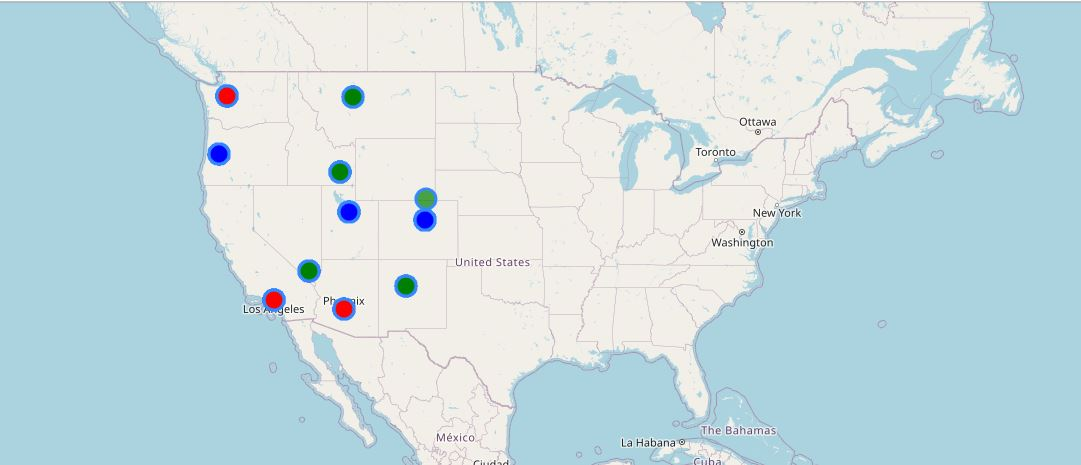

In [17]:
mydic={"state":['AL','AK','AR','CT','DE','FL','GA','HI','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','NE','NH',
                'NJ','NY','NC','ND','OH','OK','PA','RI','SC','SD','TN','TX','VT','VA','WV','WI']}
other_states=pd.DataFrame(data=mydic)
other_states['count']=0
other_states.head()

,state,count
0,AL,0
1,AK,0
2,AR,0
3,CT,0
4,DE,0


In [18]:
state_sales = amazon_data['state'].value_counts().reset_index()
state_abbr = {'California': 'CA','Washington': 'WA','Arizona': 'AZ','Colorado': 'CO','Oregon': 'OR','Utah': 'UT','Nevada': 'NV','New Mexico': 'NM',
              'Idaho': 'ID','Montana': 'MT','Wyoming':'WY'}

state_sales['state'] = state_sales['state'].replace(state_abbr)
state_sales=pd.concat([state_sales, other_states], ignore_index=True)

state_sales.head(2)

,state,count
0,CA,2001
1,WA,506


In [19]:
state_sales = state_sales.set_index("state")["count"]
state_sales["CA"]

2001

In [20]:
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    min(state_sales), max(state_sales)
)

print(colormap(5.0))

colormap

#ffffe5ff


In [ ]:
import json
import matplotlib
from branca.colormap import linear

colormap = linear.YlGn_09.scale(
    min(state_sales), 600
)


m = folium.Map([43, -100], zoom_start=4)

with open(r'E:\My projects\amazon\states4.json', 'r') as f:
  geo_json = json.load(f)

folium.GeoJson(
    geo_json_data,
    name="Sale Product Distribution for States in the US",
    style_function=lambda feature: {
        "fillColor": colormap(state_sales[feature["id"]]),
        "color": "green",
        "weight": 2,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
    },
).add_to(m)

folium.LayerControl().add_to(m)

m

Since it is too big to load in github, I use the image of the result here.
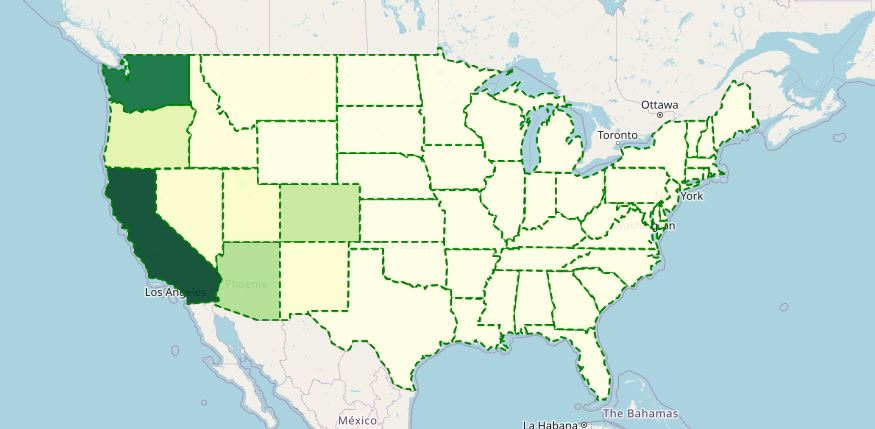

### Sale Time Analysis<a name=time></a>
I prefer to use our original data, since I would like to see if I can analyse the costumer behaviour based on their ID.
To see trends in sales and profit over time, we first extract `Month` and `Year` columns from `Order Date`.

In [25]:
amazon_data=pd.read_csv(r'E:\My projects\amazon\Amazon.csv')
amazon_data.head(2)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,6/13/2013,6/17/2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17


In [26]:
amazon_data['Order Date']=pd.to_datetime(amazon_data['Order Date'])
amazon_data['Ship Date']=pd.to_datetime(amazon_data['Ship Date'])
amazon_data['Year'] = amazon_data['Order Date'].dt.year
amazon_data['Month'] = amazon_data['Order Date'].dt.month
amazon_data.head(2)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Year,Month
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6


#### Note
Since in this part, we don't use the geographic feature of our data, I omit the columns including related data.

In [27]:
amazon_date=amazon_data.drop(['Geography'],axis=1)
amazon_date.head(2)

,Order ID,Order Date,Ship Date,EmailID,Category,Product Name,Sales,Quantity,Profit,Year,Month
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6


We can also drop `Product Name`, because it is not useful.

In [28]:
amazon_date.drop(['Product Name'],axis=1,inplace=True)

In [29]:
amazon_date.head(2)

,Order ID,Order Date,Ship Date,EmailID,Category,Sales,Quantity,Profit,Year,Month
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,Labels,14.62,2.0,6.87,2013,6
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,Furnishings,48.86,7.0,14.17,2011,6


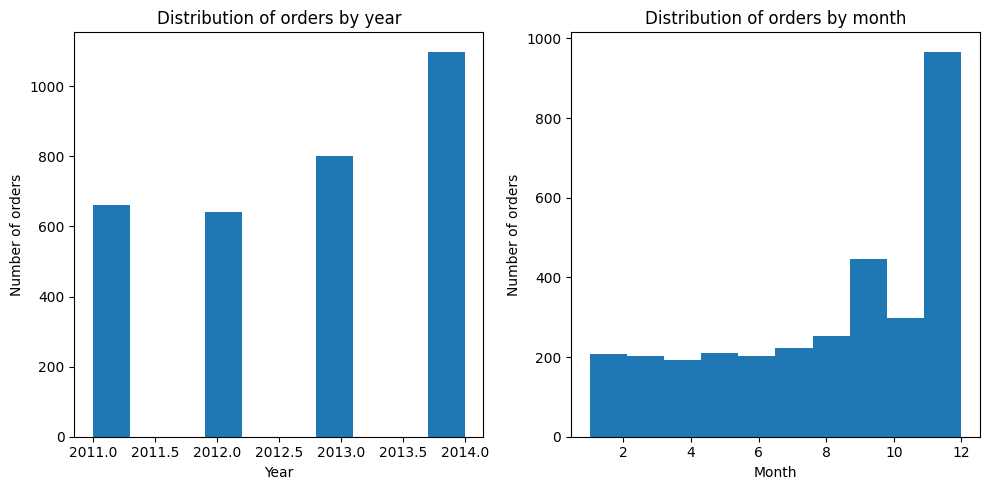

In [31]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(amazon_date['Year'])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of orders')
axes[0].set_title('Distribution of orders by year')

axes[1].hist(amazon_date['Month'])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of orders')
axes[1].set_title('Distribution of orders by month')

plt.tight_layout()

plt.show()

In [32]:
diffrence_date = amazon_date['Ship Date'] - amazon_date['Order Date']
diffrence_date = diffrence_date.dt.days
set(diffrence_date)

{0, 1, 2, 3, 4, 5, 6, 7}

### Sale Category Analysis<a name=cat></a>

In [61]:
category=amazon_data['Category'].value_counts()

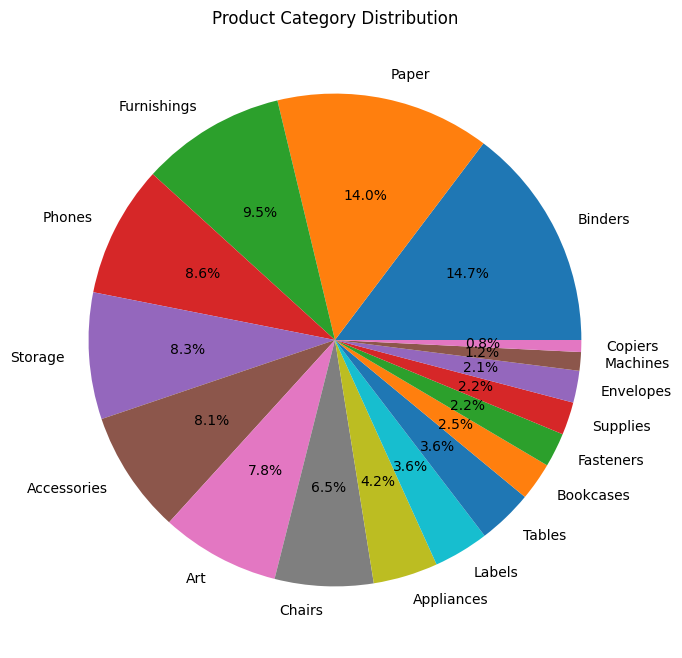

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(category, labels=category.index, autopct="%1.1f%%")
plt.title("Product Category Distribution")
plt.show()

In [80]:
category_segment_analysis = amazon_data.groupby(['Category']).agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Quantity':['sum']
})
category_segment_analysis

Sales                 Profit             Quantity
                   sum         mean       sum        mean      sum
Category                                                          
Accessories   61114.10   236.876357  16484.62   63.893876   1032.0
Appliances    30236.32   222.325882   8261.29   60.744779    492.0
Art            9212.06    36.848240   2374.15    9.496600    926.0
Binders       55961.11   118.813397  16096.78   34.175754   1868.0
Bookcases     36004.18   450.052250  -1646.50  -20.581250    306.0
Chairs       101781.36   491.697391   4027.62   19.457101    734.0
Copiers       49749.23  1989.969200  19327.25  773.090000     88.0
Envelopes      4118.10    61.464179   1908.71   28.488209    227.0
Fasteners       923.20    12.822222    275.19    3.822083    263.0
Furnishings   30072.73    98.923454   7641.26   25.135724   1175.0
Labels         5078.72    43.782069   2303.07   19.854052    480.0
Machines      42444.14  1088.311282   -618.95  -15.870513    147.0
Paper         26663.73    59.252733  12119.10   26.931333   1702.0
Phones        98684.39   356.261336   9111.06   32.891913   1066.0
Storage       70532.84   265.161053   8645.49   32.501842   1039.0
Supplies      18127.12   262.711884    626.11    9.074058    238.0
Tables        84754.60   730.643103   1482.54   12.780517    481.0

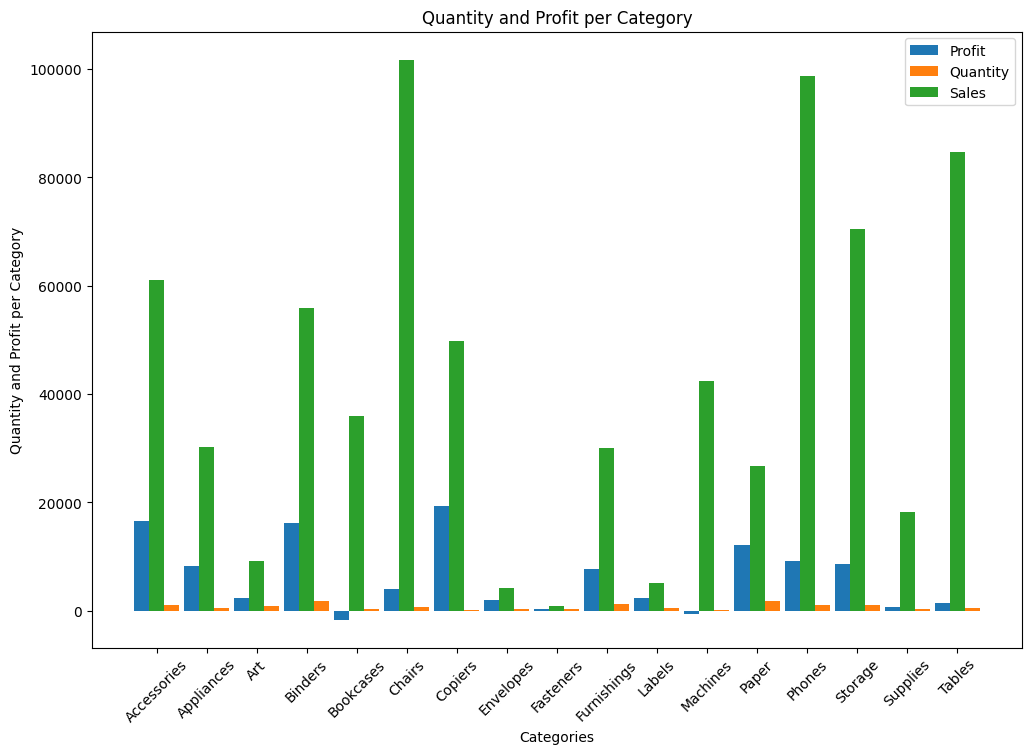

In [110]:
X = category_segment_analysis.index.get_level_values('Category')
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, category_segment_analysis['Profit']['sum'], 0.3, label = 'Profit') 
plt.bar(X_axis + 0.3, category_segment_analysis['Quantity']['sum'], 0.3, label = 'Quantity') 
plt.bar(X_axis - 0, category_segment_analysis['Sales']['sum'], 0.3, label = 'Sales') 

plt.xticks(X_axis, X) 
plt.xlabel("Categories") 
plt.ylabel("Quantity and Profit per Category") 
plt.title("Quantity and Profit per Category")
plt.xticks(rotation=45)
plt.legend() 
plt.show()

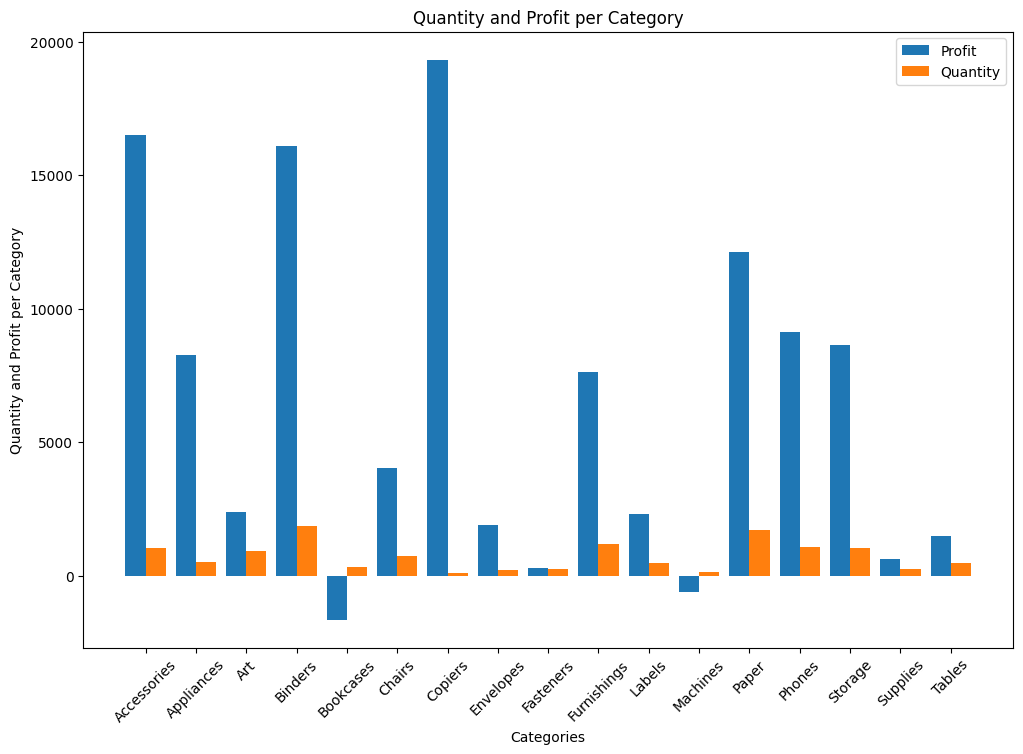

In [109]:
X = category_segment_analysis.index.get_level_values('Category')
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, category_segment_analysis['Profit']['sum'], 0.4, label = 'Profit') 
plt.bar(X_axis + 0.2, category_segment_analysis['Quantity']['sum'], 0.4, label = 'Quantity') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Categories") 
plt.ylabel("Quantity and Profit per Category") 
plt.title("Quantity and Profit per Category")
plt.xticks(rotation=45)
plt.legend() 
plt.show()

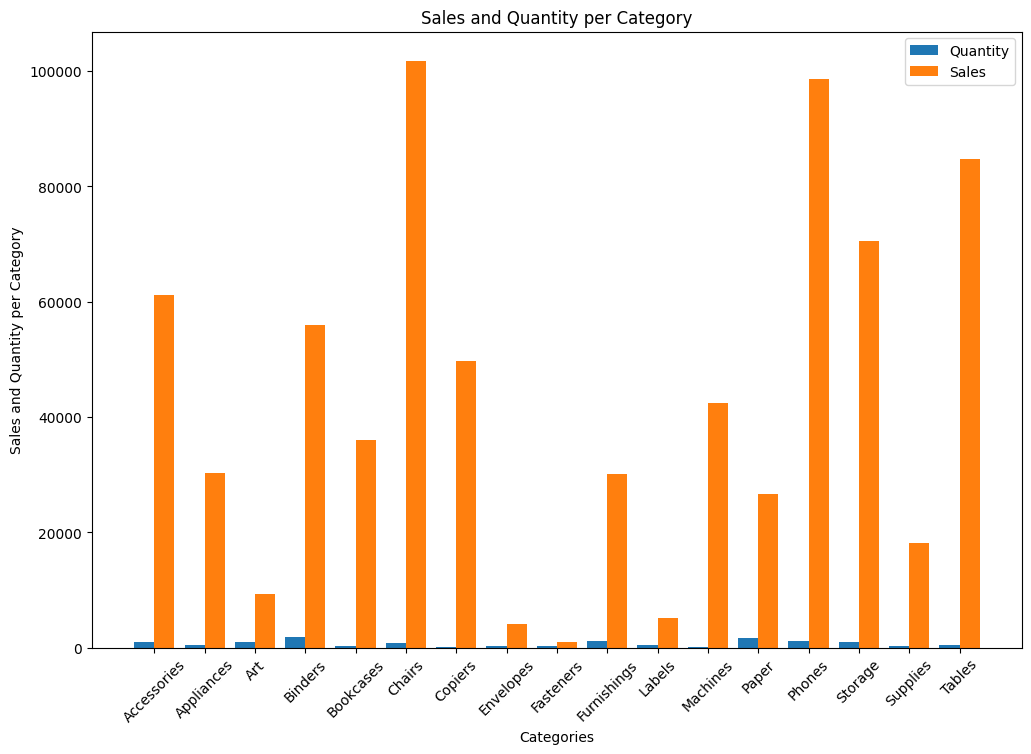

In [108]:
X = category_segment_analysis.index.get_level_values('Category')
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, category_segment_analysis['Quantity']['sum'], 0.4, label = 'Quantity') 
plt.bar(X_axis + 0.2, category_segment_analysis['Sales']['sum'], 0.4, label = 'Sales') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Categories") 
plt.ylabel("Sales and Quantity per Category") 
plt.title("Sales and Quantity per Category")
plt.xticks(rotation=45)
plt.legend()

plt.show()

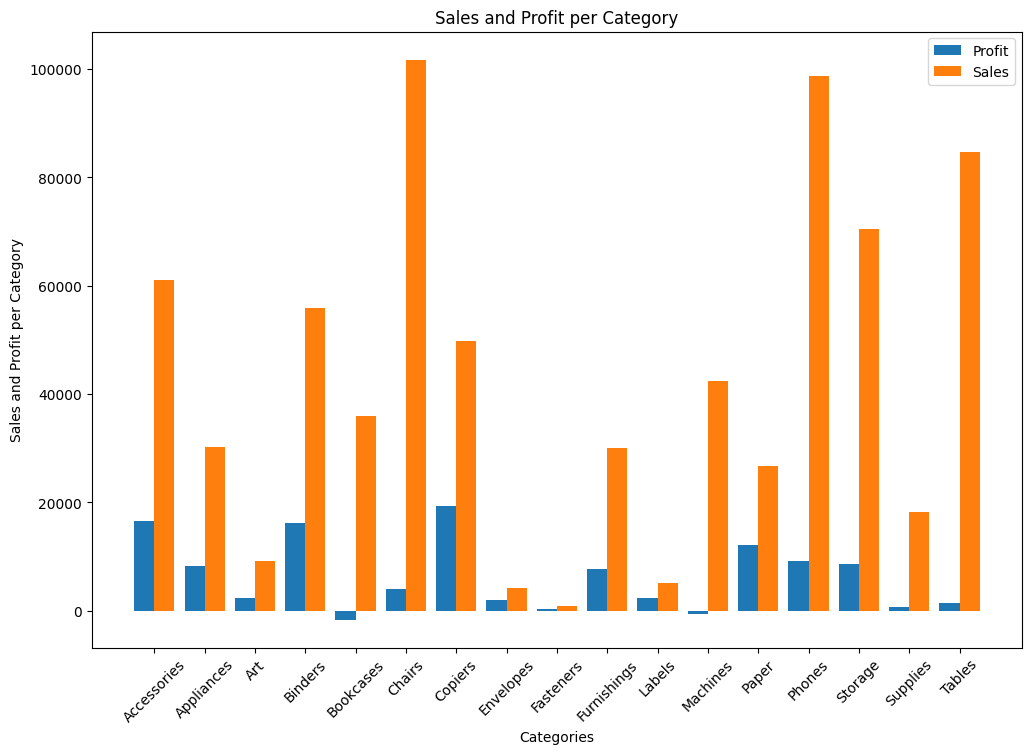

In [106]:
X = category_segment_analysis.index.get_level_values('Category')
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, category_segment_analysis['Profit']['sum'], 0.4, label = 'Profit') 
plt.bar(X_axis + 0.2, category_segment_analysis['Sales']['sum'], 0.4, label = 'Sales') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Categories") 
plt.ylabel("Sales and Profit per Category") 
plt.title("Sales and Profit per Category")
plt.xticks(rotation=45)
plt.legend()
plt.show()